# Problem Definition

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

## Questions
1: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

2: What metric would you report for this dataset?

3: What is its value?


In [310]:
import pandas as pd
import matplotlib.pyplot as plt

In [311]:
# CSV read into Pandas dataFrame
order_data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
# Reordering the data in decending order of 'order_amount'
order_data_sorted = order_data.sort_values(by=["order_amount"], ascending=False)
order_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [312]:
# Setting values of Average Order Value variables
aov_predicted = 3145.13
aov_mean = round(order_data["order_amount"].mean(), 2)
aov_mode = round(order_data["order_amount"].mode()[0], 2)
aov_median = round(order_data_sorted["order_amount"].median(), 2)

print("--------------------\n"
     + "Average Order Value\n"
     + "--------------------\n"
     + "Predicted: " + str(aov_predicted)
     + "\nMean: " + str(aov_mean)
     + "\nMedian: " + str(aov_median)
     + "\nMode: " + str(aov_mode)
     )

--------------------
Average Order Value
--------------------
Predicted: 3145.13
Mean: 3145.13
Median: 284.0
Mode: 153


# Plotting the Data

As we can see, the mean value calculated matches the predicted value, one much higher than expected for this type of data. If we plot the data, is is clear that the majority of datapoints sit far below $10,000, however there are a number of very high and very consistent datapoints which may be impacting our average result

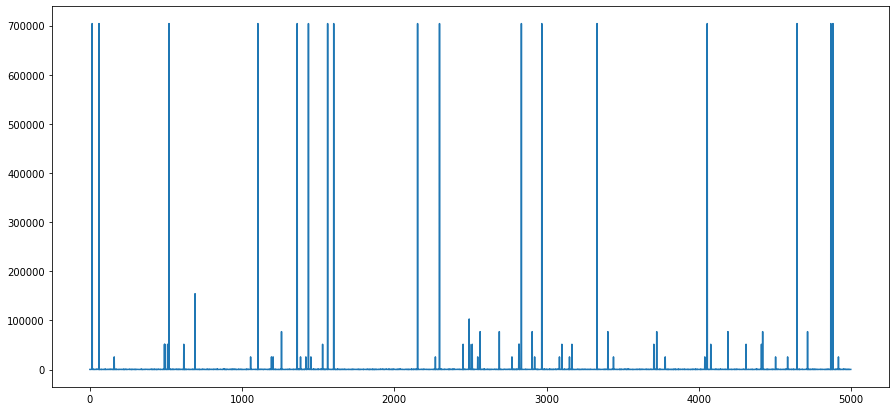

In [313]:
plt.subplots(figsize=(15, 7))
order_data["order_amount"].plot()
plt.show()

# Sorting the Dataset

When looking at the sorted data, it is clear to see that there are 17 large value orders which all share the same following field values:
- shop_id = 42

- user_id = 607

- order_amount = 70400

- total_items = 2000

- payment_method = credit card

All of these transactions share a timestamp of 4:00:00 on their respective dates and there are even some fully identical Date/Time stamps ( eg. 2017-03-02 4:00:00 )

These factors lead me to believe that these transactions are most likely erroneous.

There is a possiblity that they are scheduled, regular b2b (Business to Business) purchases, however this would be easily verifiable in a real-world scenario. 

In [314]:
order_data_sorted.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


# Remove Erroneous Data
By curring the erroneous data cut from the system, we can now recalculate our AOV results and visualise our new data.

Although removing datapoints will impact the accuracy of any calculations made regarding this dataset, there is no clear way to repair this data. With no other option, this data should be removed from calculations completely.

In [315]:
order_data_cut = order_data_sorted.drop(order_data_sorted.index[0:17])

In [359]:
order_data_cut.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1364,1365,42,797,1760.0,5,cash,2017-03-10 6:28:21
691,692,78,878,1543.5,6,debit,2017-03-27 22:51:43
1471,1472,42,907,1408.0,4,debit,2017-03-12 23:00:22
1367,1368,42,926,1408.0,4,cash,2017-03-13 2:38:34
3538,3539,43,830,1086.0,6,debit,2017-03-17 19:56:29


In [317]:
# Variables to store the second calculation of Average Order Value
aov_mean2 = round(order_data_cut["order_amount"].mean(), 2)
aov_mode2 = round(order_data_cut["order_amount"].mode()[0], 2)
aov_median2 = round(order_data_cut["order_amount"].median(), 2)

print("--------------------\n"
     + "Average Order Value\n"
     + "--------------------\n"
     + "Predicted: " + str(aov_predicted)
     + "\nMean: " + str(aov_mean2)
     + "\nMedian: " + str(aov_median2)
     + "\nMode: " + str(aov_mode2)
     )

--------------------
Average Order Value
--------------------
Predicted: 3145.13
Mean: 754.09
Median: 284.0
Mode: 153


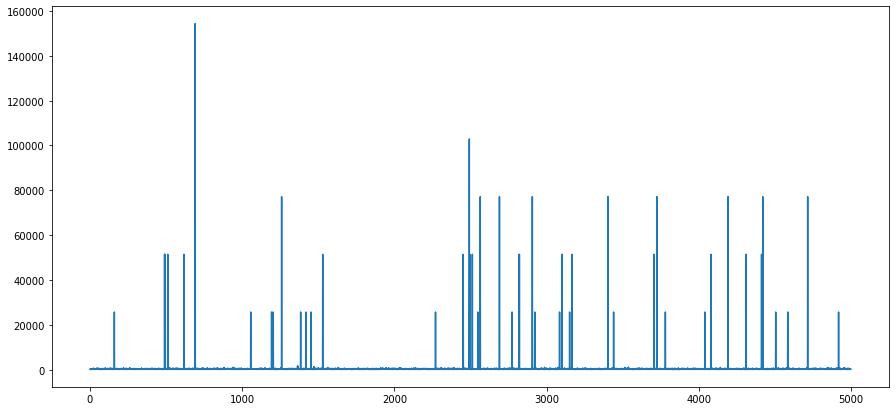

In [318]:
plt.subplots(figsize=(15, 7))
order_data_cut.sort_values(by=["order_id"], ascending=True)["order_amount"].plot()
plt.show()

# Cleaning the Data

Although our mean value has significantly dropped, it is still much higher than expected, compared with our Median and Mode calculations.

When looking at our remaining high-value orders, it is clear that all originate from Shop 78 and have order amounts which are a factor of 100 higher than most other results in the dataset. 

In [319]:
154350 / 6

25725.0

In [320]:
102900 / 4

25725.0

In [321]:
77175 / 3

25725.0

## Missing the decimal place
As stated above, each shop only sells one style of shoe. Although each of these values for one shoe are consistent, they appear to be a factor fo 100 too high. It can be presumed that a pair of sneakers costs $257.25  instead of the #25,725 calculated above. It is important for us to clean the data by ammending these errors in order to get an accurate AOV across the set.

From itterating through each order made from Shop 78, it is clear that ALL of their values for "order_amount" are missing their decimal place. This makes our cleaning process easier as we can apply the same fix for all data related to Shop 78.

The default data type for the column "order_amount" is an integer. However, the cost of a snekaer from Store 78 appears to be $257.25 and therefore requires a floating point data type. This would explain how the error of displaying 100x the correct amount came to occur, with the floating point number being erroneously cast to an integer type.

In [329]:
# Casting all values in "order_amount" col to a float datatype
order_data_cut['order_amount'] = order_data_cut['order_amount'].astype(float)

# Displaying all records relating to Shop 78
for index, row in order_data_cut.iterrows():
    if(row['shop_id'] == 78):
        print(row)
        print("---------------------")

order_id                          692
shop_id                            78
user_id                           878
order_amount                 154350.0
total_items                         6
payment_method                  debit
created_at        2017-03-27 22:51:43
Name: 691, dtype: object
---------------------
order_id                        2493
shop_id                           78
user_id                          834
order_amount                102900.0
total_items                        4
payment_method                 debit
created_at        2017-03-04 4:37:34
Name: 2492, dtype: object
---------------------
order_id                         3725
shop_id                            78
user_id                           766
order_amount                  77175.0
total_items                         3
payment_method            credit_card
created_at        2017-03-16 14:13:26
Name: 3724, dtype: object
---------------------
order_id                         4421
shop_id                     

In [330]:
# Looping through each transaction from Shop 78 and updating the vaue of "order_amount" by /100

        
for index, row in order_data_cut.iterrows():
    if(row['shop_id'] == 78):
        print("Original Order Amount: " + str(row["order_amount"]))
        order_data_cut.at[index, "order_amount"] = float(float(row["order_amount"]) / 100)
        
        print("Corrected Order Amount: " + str(order_data_cut.at[index, "order_amount"]))
        print("---------------------")


Original Order Amount: 154350.0
Corrected Order Amount: 1543.5
---------------------
Original Order Amount: 102900.0
Corrected Order Amount: 1029.0
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 77175.0
Corrected Order Amount: 771.75
---------------------
Original Order Amount: 51450.0
Corrected Order Amount: 514.5
-------------

# Data cleaned and ready for recalculation

After repairing the data by updating the datatype of "order_amount" from an integer to a floating point, we can now correctly store the decimal values related to sneakers sold at Store 78. With these values divided by 100, they now show realistic values for sneakers sold at a store. 

In [361]:
# Reordering data after being edited
order_data_cut = order_data_cut.sort_values(by=["order_amount"], ascending=False)

# Variables to store the second calculation of Average Order Value
aov_mean3 = round(order_data_cut["order_amount"].mean(), 2)
aov_mode3 = round(order_data_cut["order_amount"].mode(), 2)
aov_median3 = round(order_data_cut["order_amount"].median(), 2)

print("--------------------\n"
     + "Average Order Value\n"
     + "--------------------\n"
     + "Predicted: " + str(aov_predicted)
     + "\nMean: " + str(aov_mean3)
     + "\nMedian: " + str(aov_median3)
     + "\nMode: " + str(aov_mode3)
     )

--------------------
Average Order Value
--------------------
Predicted: 3145.13
Mean: 304.33
Median: 284.0
Mode: 0    153.0
dtype: float64


# Answers

#### 1: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
    
    I found two main problems with the dataset provided which were impacting our Average Order Value calculation.
    
#### a) 
    There were 17 transactions made with Store 42 which appeared erroneous. All values for: 
    - shop_id           = 42
    - user_id           = 607
    - order_amount      = 704000
    - total_items       = 2000
    - payment_method    = credit_card
    
    contained the exact same data. Every order was made at 4:00:00 on their respective days and there were a number of fully duplicated dates:
    - 2017-03-02 4:00:00
    - 2017-03-28 4:00:00
    - 2017-03-07 4:00:00
    
    For these reasons, I believe that the data entered here is erroneous and should therefore be removed from any calculations.
    
#### b) 
    Transactions made with Store 78 appeared to have an "order_amount" which was much too high. By dividing the "order_amount" of each transaction with the "total_items", the cost of each shoe was calculated at $25725.00. It appears clear to me that this value was a factor of 100 out from a realistic price for a single pair of shoes. All values of "order_amount" from stores other than Store 78 are listed as integers. With this store being the only one requiring a float data type for it's "order_amount" field, I would predict these values are being incorrectly cast to integer format during initial storage into the database. 
    
    As this data was reairable, it was important to not discard of useful data. This was corrected by casting the entire column "order_amount" to a float value and then dividing all "order_amount"s related to Store 78 by 100. 
    

  
#### 2: What metric would you report for this dataset?

    Predicted:   3145.13
    Mean:         304.33
    Median:       284.00
    Mode:         153.00
    
    Although the mean average value is very useful, the below graph shows that there are a small number of very high value orders. These values will skew the view of the 'most common' value of an order when using a mean average. The calculated median average value is closer to a line of best fit through the graph. This will provide a more realistic metric 
    
    

#### 3: What is its value?

    Mean Average Order Value:         304.33
    

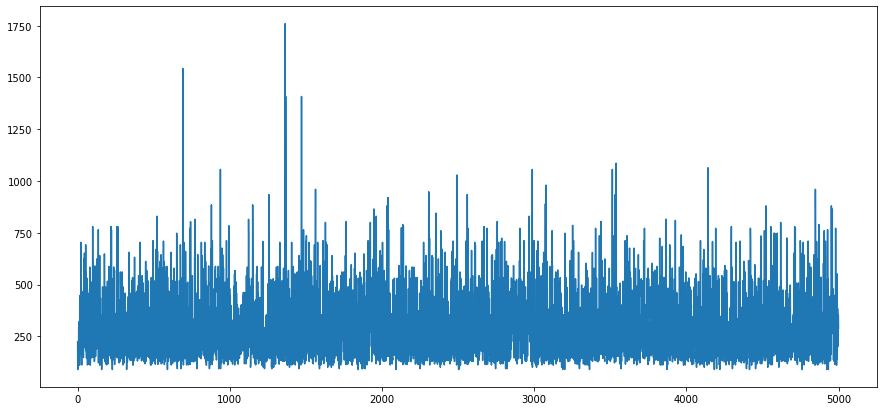

In [360]:
plt.subplots(figsize=(15, 7))
order_data_cut.sort_values(by=["order_id"], ascending=True)["order_amount"].plot()
plt.show()